In [1]:
"""@author Okorie Ndubuisi May 2025"""
import numpy as np
import matplotlib.pyplot as plt
from model import Model
import seaborn as sns
import pandas as pd
from algorithms.ml.utils.utils import one_hot_encode
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets # data from Andrew Ng coursera course
sns.set_theme()

In [2]:
X, Y = load_planar_dataset() # data from Andrew Ng coursera course
X = X.T
Y = Y.T

In [4]:
print(Y.shape)
print(X.shape)

(400, 1)
(400, 2)


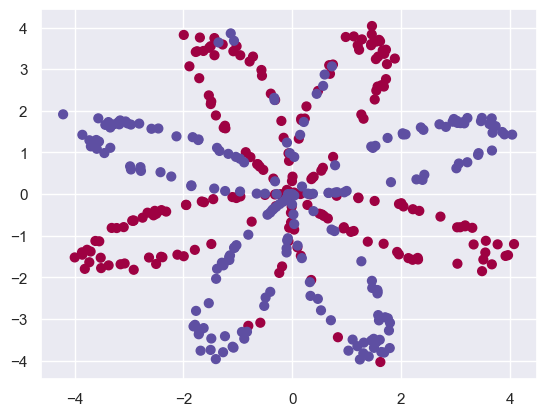

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral);

In [6]:
input_shape = X.shape
print(input_shape)
layers_size = [7, 4, 1]
dropout_rates = [1, 1, 1]
activations = ['tanh', 'tanh', 'sigmoid']
model = Model(input_shape, layers_size, activations, dropout_rates=dropout_rates)

(400, 2)


In [8]:
num_iters = 100000
learning_rate = 0.0001
decay=False
normalized = False
optimizer = 'adam'
model.fit(X, Y, num_iters=num_iters,decay=decay,
           learning_rate=learning_rate, 
           tuning_param=1,optimizer=optimizer, normalized=normalized, epochs=1)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 0.71026998   
Iteration 10000: Cost 0.19174738   
Iteration 20000: Cost 0.14042755   
Iteration 30000: Cost 0.12804692   
Iteration 40000: Cost 0.12661360   
Iteration 50000: Cost 0.12616226   
Iteration 60000: Cost 0.12598504   
Iteration 70000: Cost 0.12589690   
Iteration 80000: Cost 0.12582278   
Iteration 90000: Cost 0.12575650   
Iteration 99999: Cost 0.12569082   


In [9]:
# Print train accuracy
predictions = model.predict(X)
model.accuracy(predictions, Y)

Accuracy: 91%


In [10]:
model_layers = model.layers

In [11]:
layer1 = model_layers['layer1']

In [12]:
layer1.weights

array([[ 0.57534212, -1.69239395],
       [-5.95516656, -2.76896108],
       [-0.0867844 , -7.13453457],
       [-6.55561242, -6.06772812],
       [ 6.403475  , -6.96078755],
       [ 1.00931168,  1.19990982],
       [ 5.50107635, -2.14573248]])

In [13]:
layer1.bias

array([[ 5.64688083],
       [ 0.40756622],
       [ 0.01111038],
       [ 0.16189966],
       [ 0.16981041],
       [ 0.13977447],
       [-0.00949438]])

In [14]:
layer1.name

'layer1'

In [15]:
layer1.units

7

In [16]:
layer1.activation

'tanh'

In [17]:
layer1.trainable

True

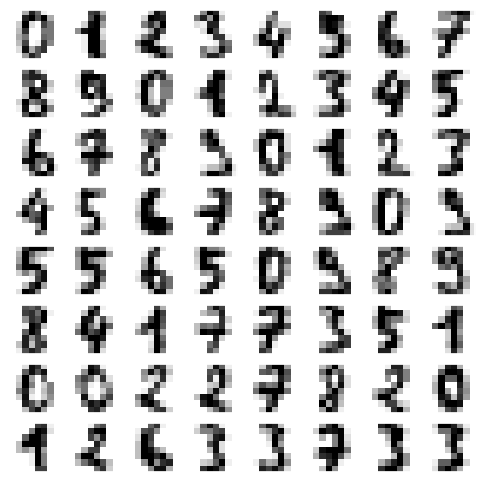

In [19]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [70]:
X = digits.data[200:, :]
Y = digits.target[200:]
 
X_test = np.array(digits.data[:200, :], dtype=np.float64)
Y_true = digits.target[:200]

In [71]:
print(X.shape)
print(Y.shape)

(1597, 64)
(1597,)


In [72]:
Y[:20]

array([1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3])

In [73]:
Y_train, _ = one_hot_encode(Y, True)

In [74]:
print(Y_train.shape)

(1597, 10)


In [75]:
Y_train[:20]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [76]:
input_shape = X.shape
layers = [25, 20, 15, 10]
dropout_rates = [1.0, 1.0, 1.0, 1.0]
activations = ['tanh', 'tanh', 'tanh', 'softmax']
model = Model(input_shape, layers, activations, dropout_rates)
num_iters = 1000
learning_rate = 1e-7
decay=True
normalized = False
optimizer = 'adam'
bias = True
model.fit(X, Y_train, num_iters=num_iters, 
          learning_rate=learning_rate,
            tuning_param=1,
            optimizer=optimizer,batch_size=1,
              decay=decay, normalized=normalized, 
          bias=bias, epochs=1)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 3.74081639   
Iteration  100: Cost 3.71125094   
Iteration  200: Cost 3.71113608   
Iteration  300: Cost 3.71099095   
Iteration  400: Cost 3.71082329   
Iteration  500: Cost 3.71063752   
Iteration  600: Cost 3.71043774   
Iteration  700: Cost 3.71022545   
Iteration  800: Cost 3.71000202   
Iteration  900: Cost 3.70976934   
Iteration  999: Cost 3.70953080   


 Let us generate data using  this
linear function for our model test, our model will try to estimate the weights and bias term
of this function, this function has 3 features so our weights will be 3 plus 1 bias term. Our function is truly linear, however it should be noted that in real world application you can hardly see any relationship that is wholely linear. But we will simulate data using this function, our function says: "I will generate dataset using some coefficients and intercept, please find those coefficients and intercept that I used to generate the dataset." So the coefficients are [7, 2, -5] and the intercept is 3. Our model will attempt to find these four values.

In [12]:
f = lambda x1, x2, x3: 7*x1 + 2*x2 - 5*x3 + 3

In [15]:
#Generate the training data using our function
np.random.seed(42)
X = np.random.randint(1, 100, size=(1_000, 3))
Y = f(X[:,0], X[:,1], X[:,2])
Y = Y[:, np.newaxis]
print(X.shape)
print(Y.shape)

#Generate test data using our function
X_test = np.random.randint(1, 10, size=(50, 3))
Y_true = f(X_test[:,0], X_test[:,1], X_test[:,2])
Y_true = Y_true[:, np.newaxis]
print(X_test.shape)
print(Y_true.shape)
input_shape = X.shape

(1000, 3)
(1000, 1)
(50, 3)
(50, 1)


In [16]:
num_iters = 100000
learning_rate = 1e-5
decay=False
normalized = False
bias = True
dropout_rates = [1.0, 1.0, 1.0, 1.0]
optimizer = 'adam'
layers = [15, 10, 3, 1]
activations = ['relu', 'relu', 'relu', 'linear']
model = Model(input_shape, layers, activations, dropout_rates)
model.fit(X, Y, 
          num_iters=num_iters,
          learning_rate=learning_rate,
          normalized=normalized,
            optimizer=optimizer, decay=decay, bias=bias)

Running epoch 1 / 1
Running mini-batch 1 / 1
Iteration    0: Cost 110530.87962794   
Iteration 10000: Cost 7046.38470974   
Iteration 20000: Cost 125.58631664   
Iteration 30000: Cost 2.23273224   
Iteration 40000: Cost 2.08843998   
Iteration 50000: Cost 2.06791531   
Iteration 60000: Cost 2.06589779   
Iteration 70000: Cost 2.06582208   
Iteration 80000: Cost 2.06575691   
Iteration 90000: Cost 2.06569806   
Iteration 99999: Cost 2.07106514   


Our model is performing really poor, what could possibly be the cause? Anyway, the reason is simple, our data is truly linear so by adding nonlinearity activation function like relu, it shut offf some possible values of Y. We can examine carefully and see Y can actually have negative values but relu is preventing it from having such values. So choice of activation function is really this important in neural network architeural design.

In [17]:
costs = model.costs

In [18]:
iterations = model.iterations

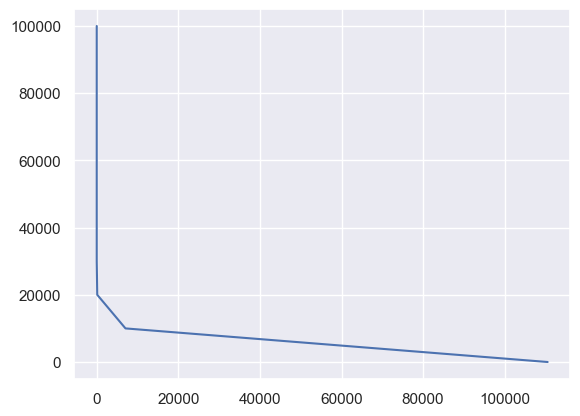

In [19]:
plt.plot(costs, iterations);

In [22]:
layers = model.layers
layers

{'layer1': <dense.Dense at 0x1922fb9dbd0>,
 'layer2': <dense.Dense at 0x1923006cfd0>,
 'layer3': <dense.Dense at 0x192300c4150>,
 'layer4': <dense.Dense at 0x192300cef10>}

In [23]:
output_layer = layers['layer4']

In [24]:
output_layer.weights

array([[-0.24975691, -1.29955239,  1.22336176]])

In [25]:
output_layer.bias

array([[1.38358229]])

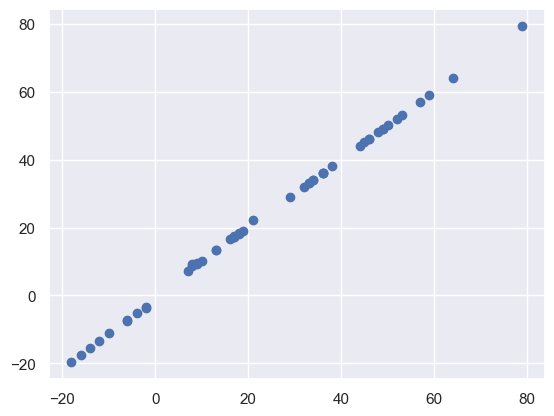

In [26]:
predictions = model.predict(X_test)
plt.scatter(np.squeeze(Y_true), np.squeeze(predictions));

The function we generated the data from is truly linear, by introducing non-linearity in our model using tanh and relu, our model was unable to  provide accurate predictions. For instance, relu removed negative values, but our function may generate negative values. So we can obviously conclude that linear regression will better for this task or our model needs to be adjusted to accomodate truly linear data.